In [1]:
!pip install sklearn pandas matplotlib sklearn seaborn

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

# load Dataset

In [3]:
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
df = pd.read_csv("data/iris.data", names = column_names)

1. Mostrar los cincos primeros datos de la base de datos.

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


2. Mostrar la informacion de la base de datos: 
¿Cuantas columnas tiene la base de datos ? 
¿Cuantos valuros nulos hay?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


3. Mostrar cuantos datos de cada tipos de especies de iris hay.

In [6]:
df.value_counts()

sepal_length  sepal_width  petal_length  petal_width  species        
4.9           3.1          1.5           0.1          Iris-setosa        3
5.8           2.7          5.1           1.9          Iris-virginica     2
              4.0          1.2           0.2          Iris-setosa        1
5.9           3.0          4.2           1.5          Iris-versicolor    1
6.2           3.4          5.4           2.3          Iris-virginica     1
                                                                        ..
5.5           2.3          4.0           1.3          Iris-versicolor    1
              2.4          3.7           1.0          Iris-versicolor    1
                           3.8           1.1          Iris-versicolor    1
              2.5          4.0           1.3          Iris-versicolor    1
7.9           3.8          6.4           2.0          Iris-virginica     1
Length: 147, dtype: int64

4. Mostrar una grafica "join" del sepal_length y sepal_width donde se puedan ver la distribucion de estos dos valores.

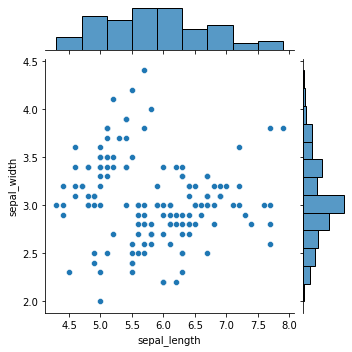

In [21]:
sns.jointplot(x='sepal_length',y='sepal_width',data=df,height=5)

5. Mostrar grafica FacetGrid  del sepal_length y sepal_width donde se puedan ver la distribucion de estos dos valores con respecto a la especie

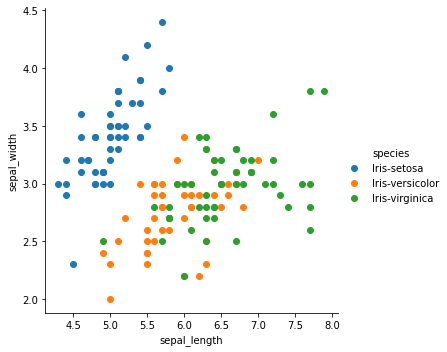

In [8]:
sns.FacetGrid(df,hue='species',height=5).map(plt.scatter,'sepal_length','sepal_width').add_legend()

6. Realizar grafica de caja de bigotes del petal_length con respecto la especie de iris

<AxesSubplot:xlabel='species', ylabel='petal_length'>

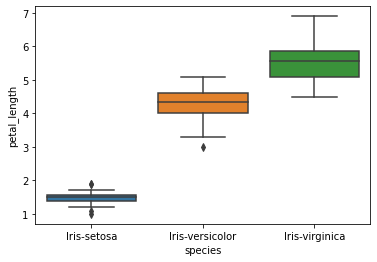

In [9]:
sns.boxplot(x='species',y='petal_length',data=df)

7. Mostrar la grafica stripplot del tamaño sepal_length con respecto a la especie

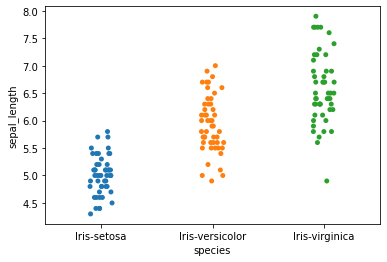

In [10]:
ax=sns.stripplot(x='species',y='sepal_length',data=df,jitter=True,edgecolor='gray')

8. Combinar la grafica de caja de bigotes y el striplot y mostrarla en una sola

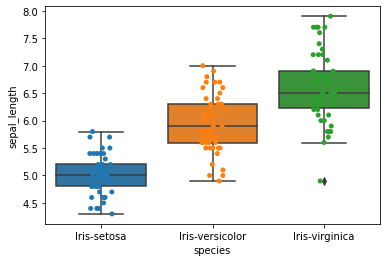

In [11]:
ax=sns.boxplot(x='species',y='sepal_length',data=df)
ax=sns.stripplot(x='species',y='sepal_length',data=df,jitter=True,edgecolor='gray')

9. Realizar la grafica de violines con sepal_length vs la especie.

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

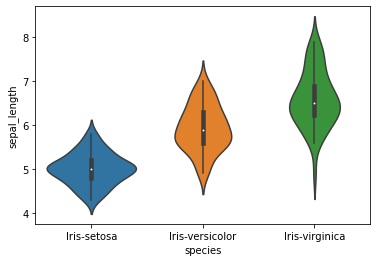

In [12]:
sns.violinplot(x='species',y='sepal_length',data=df,size=6)

10. Generar la grafica Pair Plot de la base de datos 

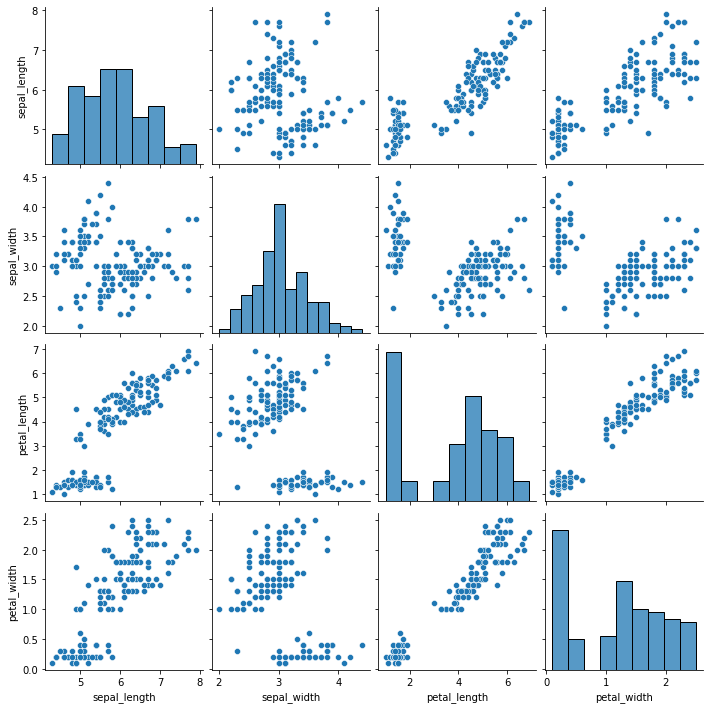

In [13]:
sns.pairplot(data=df,kind='scatter')

11. Generar la grafica pair plot dependiendo la especie

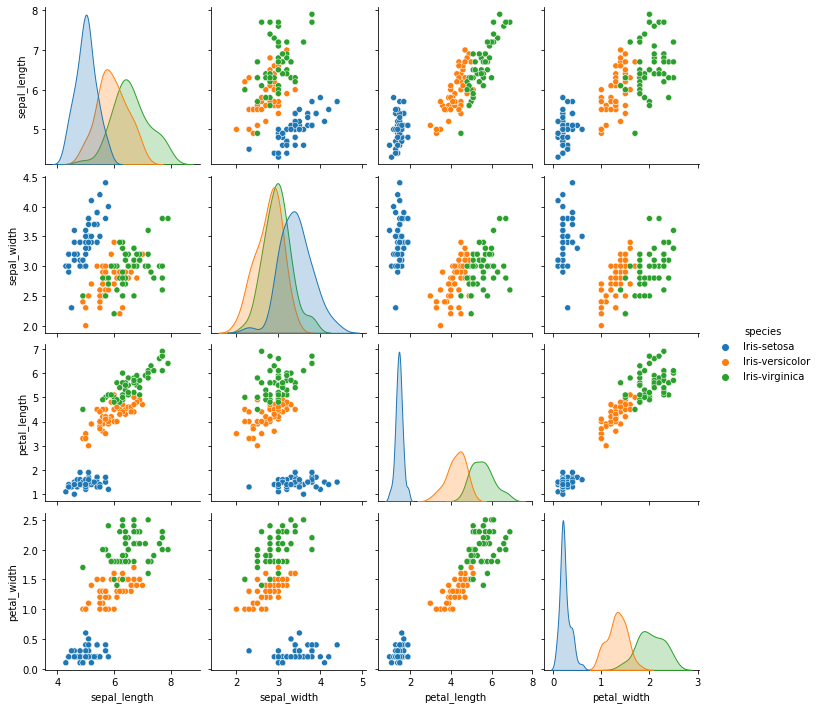

In [14]:
sns.pairplot(df,hue='species')

12. Generar un mapa de calor con los valores de la correlacion de la base de datos iris. 
Mostrando los valores en cada una de las cuadrados y con el cmap="summer'

<AxesSubplot:>

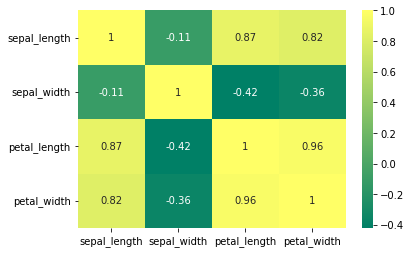

In [15]:
sns.heatmap(df.corr(),annot=True,cmap='summer')

13. Generar el histograma de cada una de las caracteristicas.

array([[<AxesSubplot:title={'center':'sepal_length'}>,
        <AxesSubplot:title={'center':'sepal_width'}>],
       [<AxesSubplot:title={'center':'petal_length'}>,
        <AxesSubplot:title={'center':'petal_width'}>]], dtype=object)

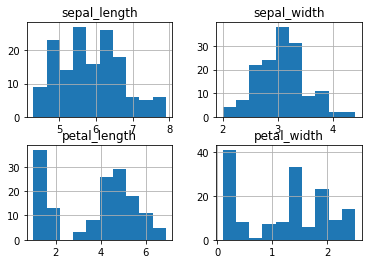

In [16]:
df.hist()

14.  Generar grafica Swarm de la caracteristica petal_length con respecto la especie.

c:\users\ccalzate\downloads\visualization\venv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='species', ylabel='petal_length'>

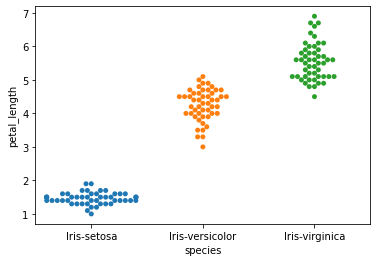

In [23]:
sns.swarmplot(x="species", y="petal_length", data=df, s=5)

15. Divide los datos en features_train, target_train y feature_test, target_test utilizando la libreria train_Test_split. Divide los datos en una proporcion acorde.

In [18]:
features = df.drop(['species'], axis=1)
targets = df["species"]
features_train, features_test, target_train, target_test = train_test_split(features, targets)
#features_train, features_test, target_train, target_test = ##### Escribe tu codigo aqui ####

Ejecuta el siguiente modelo de regresion logistica 

In [24]:
# crear modelo de clasificacion usando Regresión logística
classifier = LogisticRegression(solver='lbfgs', max_iter=300 )
# entrenar modelo y hacer predicciones
target_predicted = classifier.fit(features_train, target_train).predict(features_test)

16. Con ayuda de target_predicted y target_test genera la matriz de confusion.

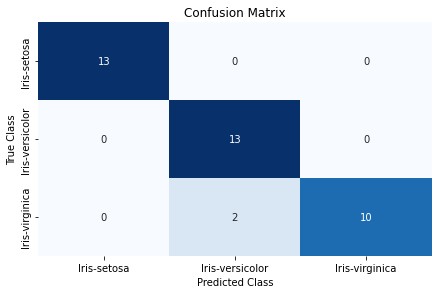

In [25]:
# crear matriz de confusión
matrix = confusion_matrix(target_test, target_predicted)
dataframe = pd.DataFrame(matrix, index=targets.unique(), columns=targets.unique())
# crear mapa de calor dibujar mapa de calor
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()